In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline 

In [3]:
text_doc = pd.read_csv('HW01_data.txt',sep = r'\s+')

In [4]:
x = text_doc['x'].values
y = text_doc['y'].values

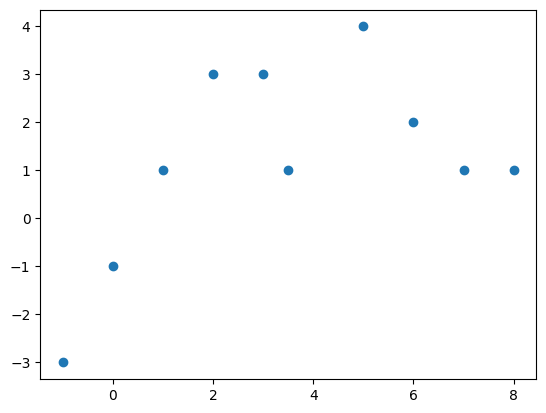

In [5]:
plt.scatter(x,y)

In [ ]:
def linear_interpolate(x,y,N):
    m_vals = np.zeros(len(x)-1)  # Stores all slopes of the line segments between any two consecutive data points 
    y_int = [] # These are the y points for the interpolation for each g_j     
    x_int = [] # This array will store the sequential points for the interpolation that we need in x axis  
                         
    for j in range(0,len(m_vals)): 
        dx = (x[j+1] - x[j])/N      # spacing for the "N" resolution for interpolation
        m_vals[j] = (y[j+1] - y[j])/(x[j+1] - x[j]) # Slope for a g_j'th line segment
        
        for i in range(0,N):
            current_x = x[j] + i * dx
            y_data = y[j] + m_vals[j] * (current_x - x[j])
            y_int.append(y_data)
            x_int.append(current_x)
    return np.array(x_int),np.array(y_int)


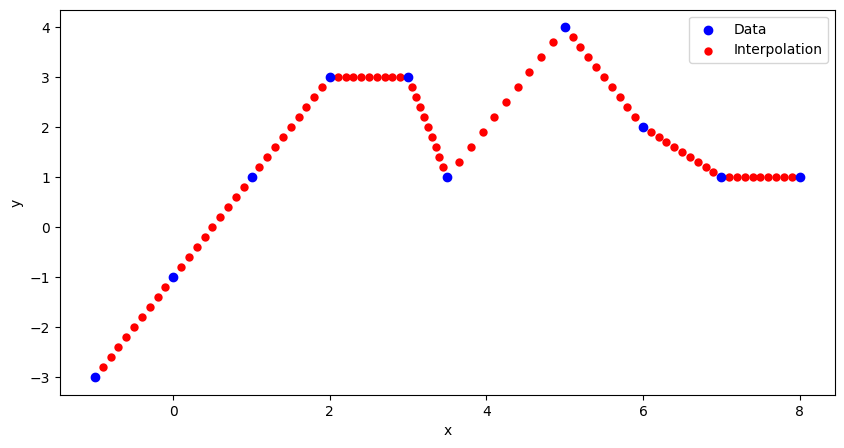

In [105]:
x_interpolate, y_interpolate = linear_interpolate(x,y,10)
plt.figure(figsize=(10, 5))

# Plot the original points from your CSV
plt.scatter(x, y, color='blue', label='Data', zorder=5)

# Plot the interpolation (flattened)
plt.scatter(x_interpolate, y_interpolate, label='Interpolation', color='red',linewidths = 0.01)
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.legend()
plt.show()

In [109]:
cubic_spline = CubicSpline(x,y)
x_new = np.linspace(-1, 8, 80)
y_new = cubic_spline(x_new) # Evaluate the spline at the new points

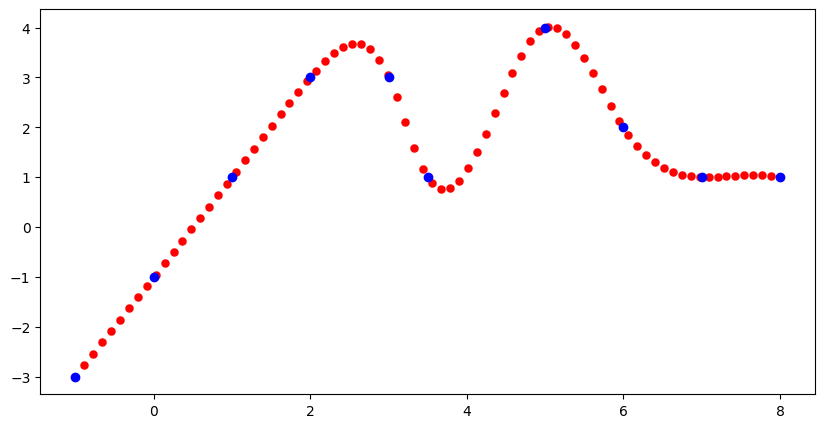

In [113]:
plt.figure(figsize=(10, 5))
plt.scatter(x_new,y_new,color='red', label='Data', linewidths=0.1)
plt.scatter(x,y, label='Interpolation', color='blue')

In [2]:
def sampling_function(x_vals):
    return np.sin(np.pi/2*x_vals) + x_vals/2

In [5]:
x_sampling = np.arange(0,11,1)

In [6]:
x_sampling

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
y_sampling = sampling_function(x_sampling)

In [8]:
y_sampling

array([0. , 1.5, 1. , 0.5, 2. , 3.5, 3. , 2.5, 4. , 5.5, 5. ])